# Analyze classes

## Initial setup

### Load modules

In [1]:
# modules in this package
import load_and_preprocess as lp
import analysis as at
import bic_and_aic as ba
import plot_tools as pt
import file_io as io
import numpy as np
import xarray as xr
import density
import gmm
# plotting tools
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib as mpl
import cmocean
# os tools
import os.path

# suppress a particular warning
import warnings
warnings.filterwarnings('ignore', 'RuntimeWarning: All-NaN slice encountered')

### Set runtime parameters (file locations, etc.)

In [2]:
# set locations and names
descrip = 'WeddellOnly' # extra description for filename
data_location = '../../so-chic-data/' # input data location
classified_data_location = 'models/profiles_-65to80lon_-85to-30lat_20to1000depth_5K_allDomain_revised.nc'
ploc = 'plots/plots_WeddellClassOnly_top1000m_K03_forPaper/'
#ploc = 'tests/'
dloc = 'models/'

# if plot directory doesn't exist, create it
if not os.path.exists(ploc):
    os.makedirs(ploc)

# save the processed output as a NetCDF file?
saveOutput = False

# number of PCA components (roughly 95%)
n_pca = 6

# make decision about n_components_selected (iterative part of analysis)
n_components_selected = 3

#longitude and latitude range
lon_min = -65
lon_max =  80
lat_min = -80
lat_max = -45
# depth range
zmin = 20.0
zmax = 1000.0
# density range
sig0range = (26.6, 28.0)

# temperature and salinity ranges for plotting
lon_range=(lon_min, lon_max)
lat_range=(lat_min, lat_max)
Trange=(-2.2, 6.0)
Srange=(33.5, 35.0)

# create filename for saving GMM and saving labelled profiles
pca_fname = dloc + 'pca_' + str(int(lon_min)) + 'to' + str(int(lon_max)) + 'lon_' + str(int(lat_min)) + 'to' + str(int(lat_max)) + 'lat_' + str(int(zmin)) + 'to' + str(int(zmax)) + 'depth_' + str(int(n_pca)) + descrip
gmm_fname = dloc + 'gmm_' + str(int(lon_min)) + 'to' + str(int(lon_max)) + 'lon_' + str(int(lat_min)) + 'to' + str(int(lat_max)) + 'lat_' + str(int(zmin)) + 'to' + str(int(zmax)) + 'depth_' + str(int(n_components_selected)) + 'K_' + descrip
fname = dloc + 'profiles_' + str(int(lon_min)) + 'to' + str(int(lon_max)) + 'lon_' + str(int(lat_min)) + 'to' + str(int(lat_max)) + 'lat_' + str(int(zmin)) + 'to' + str(int(zmax)) + 'depth_' + str(int(n_components_selected)) + 'K_' + descrip + '.nc'

# colormap
colormap = plt.get_cmap('Dark2', n_components_selected)
colormap_cividis = plt.get_cmap('cividis', 20)

### Load classified profile data

In [3]:
dfp = xr.open_dataset("weddell_classified_n03.nc")
# select the top pressure level for plotting purposes
df1D = dfp.isel(depth=0)

### Mixed layer depth 

class = 0
min / Q25 / Q50 / Q75 / max
94.87 / 161.87 / 185.10 / 209.77 / 416.75
class = 1
min / Q25 / Q50 / Q75 / max
26.06 / 76.11 / 103.69 / 137.75 / 288.47
class = 2
min / Q25 / Q50 / Q75 / max
37.13 / 109.46 / 134.49 / 162.97 / 490.35
plot_tools.plot_hist_map
file_io.load_bathymetry


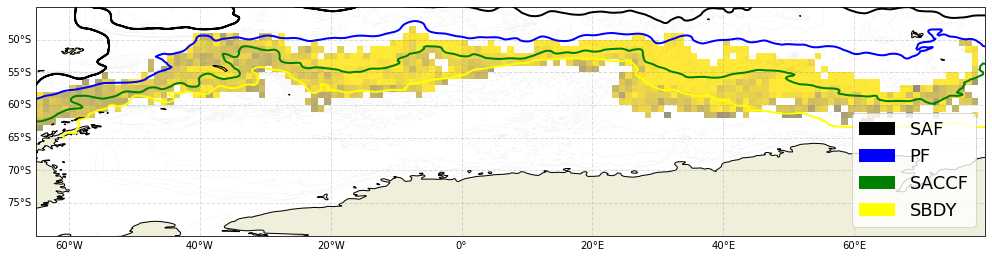

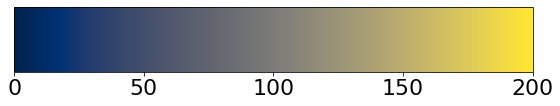

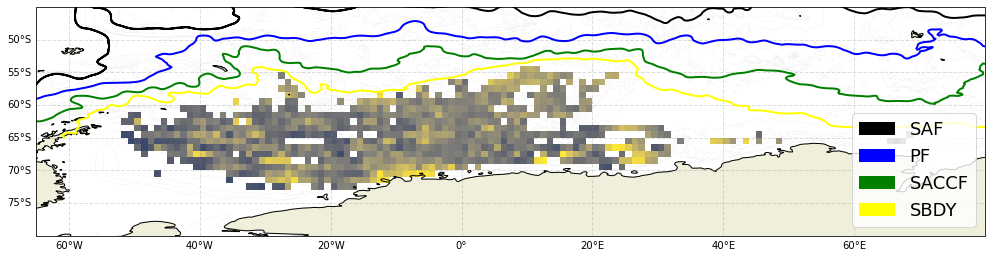

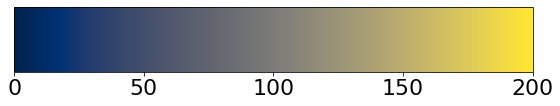

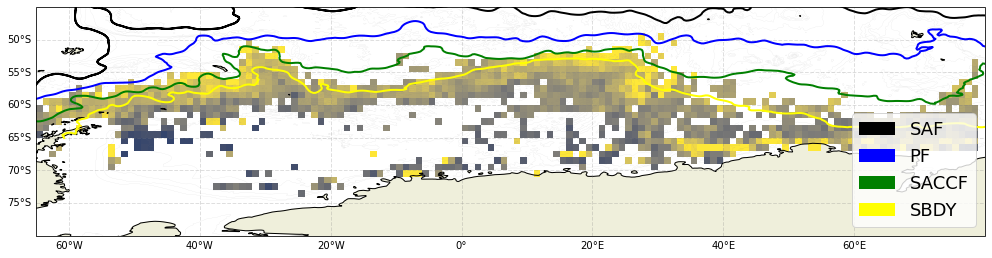

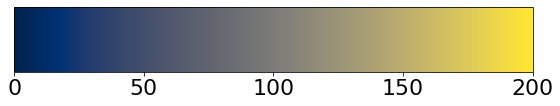

In [4]:
# print mld stats
density.calc_oneLevel_stats(ploc, dfp, n_components_selected)

# histogram map (mixed layer depth)
pt.plot_hist_map(ploc, dfp, lon_range, lat_range,
                 n_components_selected,
                 c_range=(0,200),
                 vartype='mld',
                 colormap=plt.get_cmap('cividis'))

## Depth of temperature  minimum

plot_tools.plot_hist_map
file_io.load_bathymetry


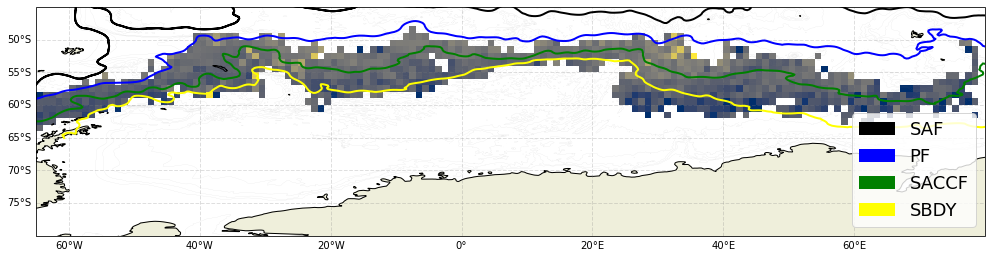

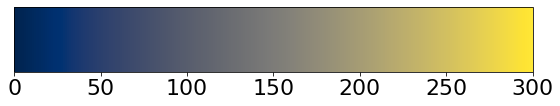

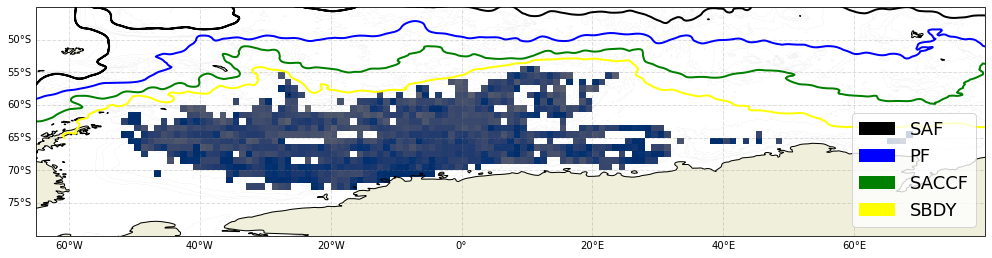

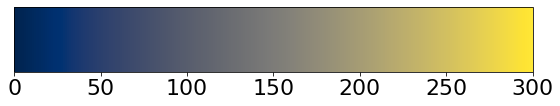

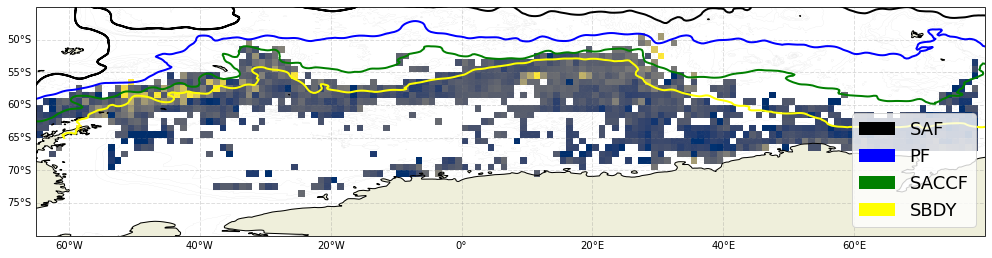

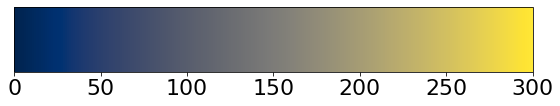

In [5]:
# histogram map (mixed layer depth)
pt.plot_hist_map(ploc, dfp, lon_range, lat_range,
                 n_components_selected,
                 c_range=(0,300),
                 vartype='Tmin_depth',
                 colormap=plt.get_cmap('cividis'))

### Depth of temperature maximum

plot_tools.plot_hist_map
file_io.load_bathymetry


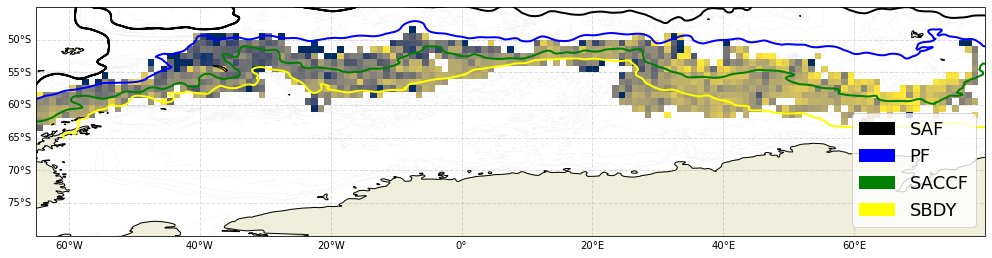

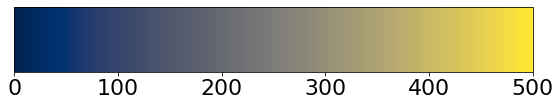

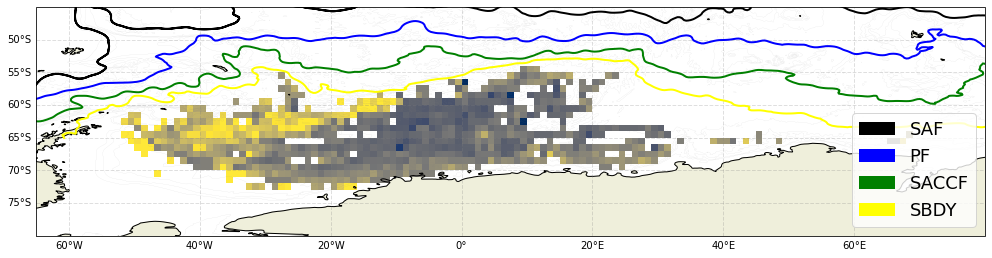

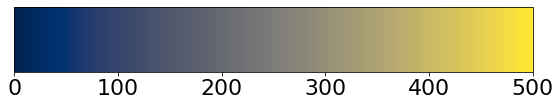

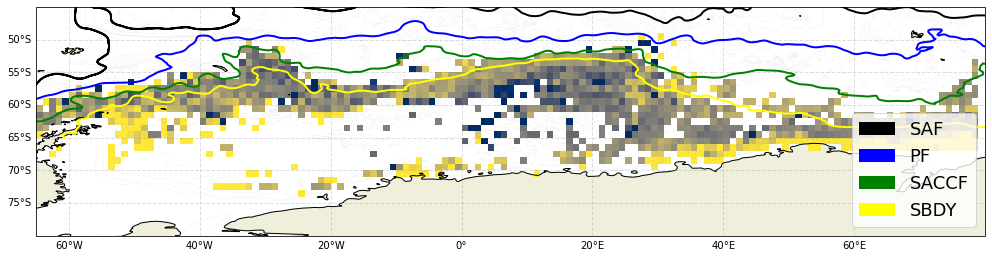

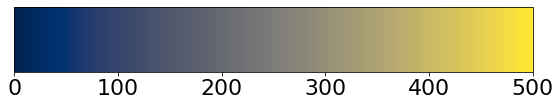

In [6]:
# histogram map (mixed layer depth)
pt.plot_hist_map(ploc, dfp, lon_range, lat_range,
                 n_components_selected,
                 c_range=(0,500),
                 vartype='Tmax_depth',
                 colormap=plt.get_cmap('cividis'))

### Depth of salinity max

plot_tools.plot_hist_map
file_io.load_bathymetry


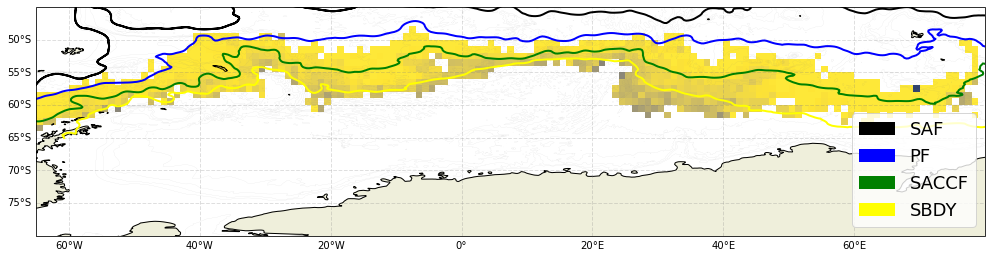

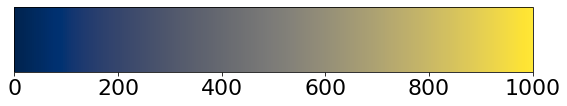

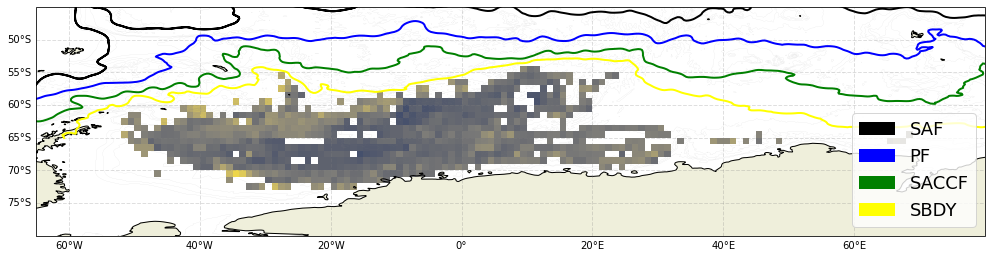

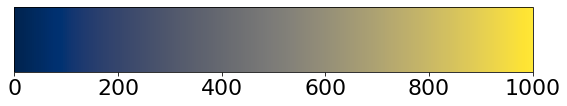

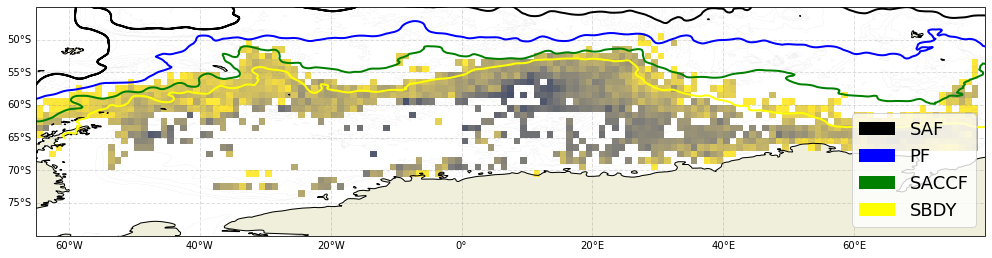

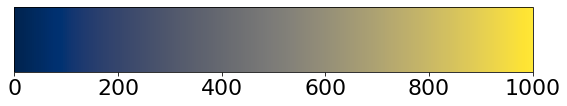

In [7]:
# histogram map (mixed layer depth)
pt.plot_hist_map(ploc, dfp, lon_range, lat_range,
                 n_components_selected,
                 c_range=(0,1000),
                 vartype='Smax_depth',
                 colormap=plt.get_cmap('cividis'))

### Depth of salinity minimum

plot_tools.plot_hist_map
file_io.load_bathymetry


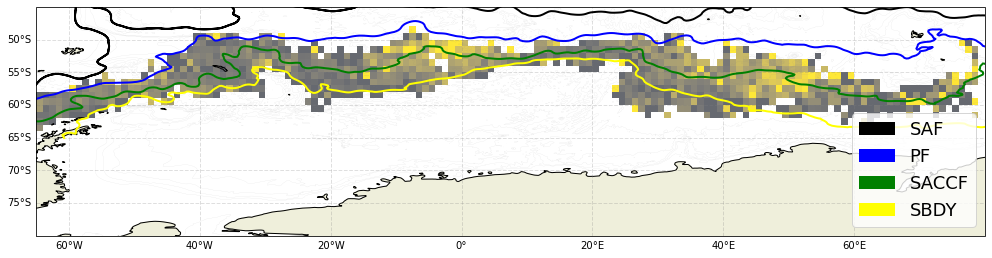

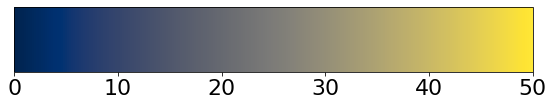

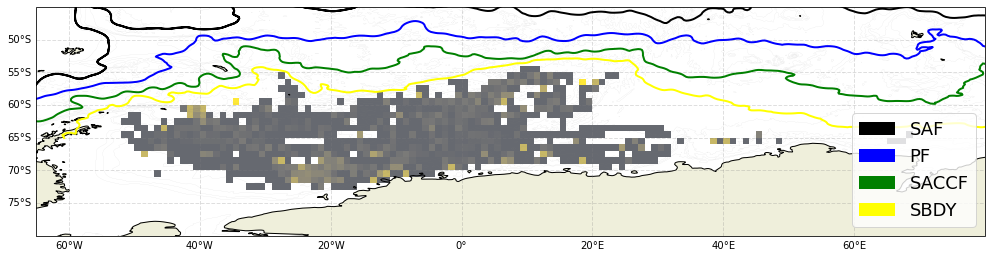

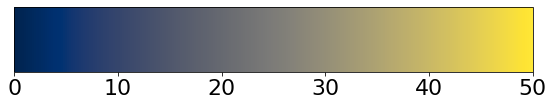

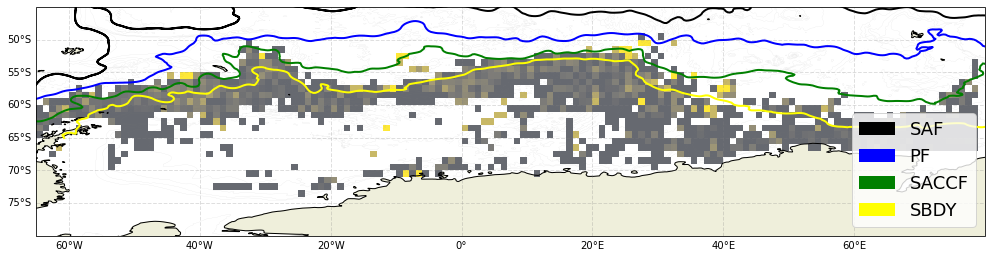

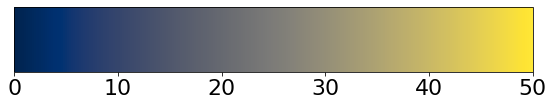

In [8]:
# histogram map (mixed layer depth)
pt.plot_hist_map(ploc, dfp, lon_range, lat_range,
                 n_components_selected,
                 c_range=(0,50),
                 vartype='Smin_depth',
                 colormap=plt.get_cmap('cividis'))

### Dynamic height

plot_tools.plot_dynamic_height_maps
----- Dynamic height: 20 dbar -----
plot_tools.plot_hist_map
file_io.load_bathymetry


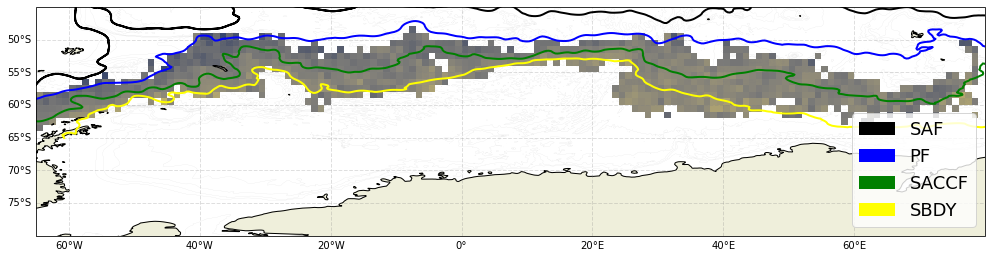

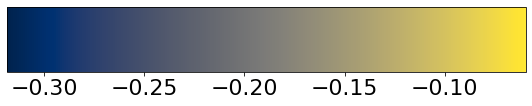

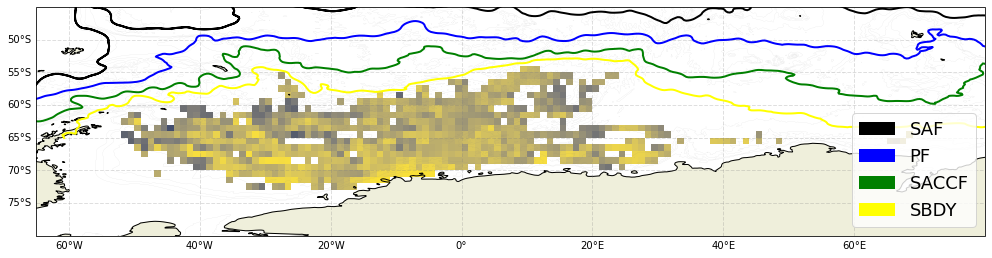

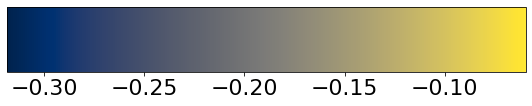

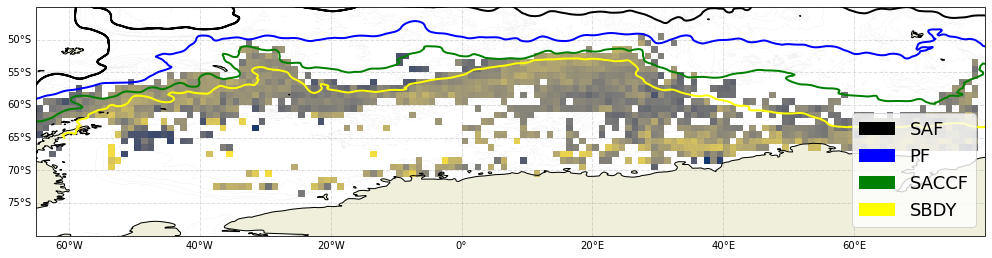

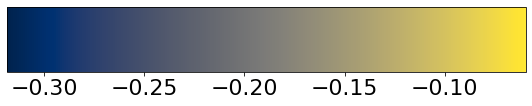

----- Dynamic height: 100 dbar -----
plot_tools.plot_hist_map
file_io.load_bathymetry


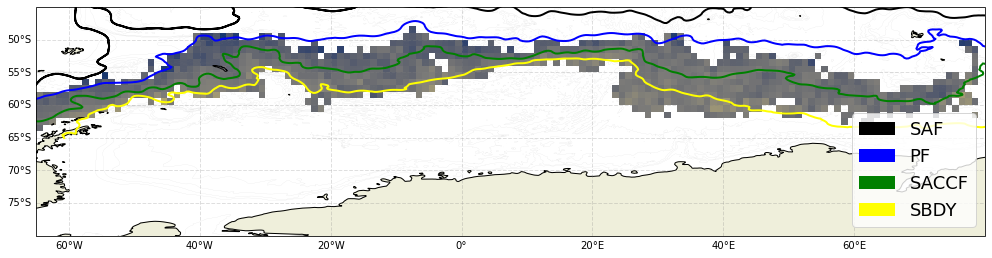

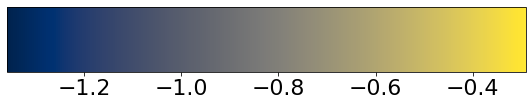

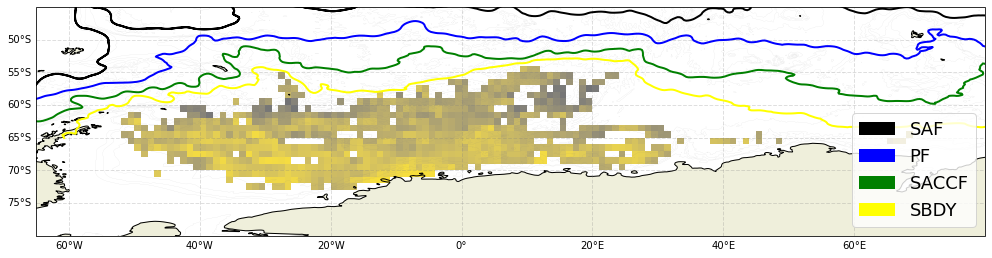

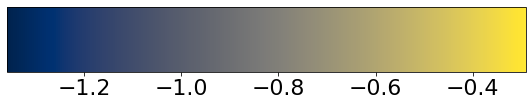

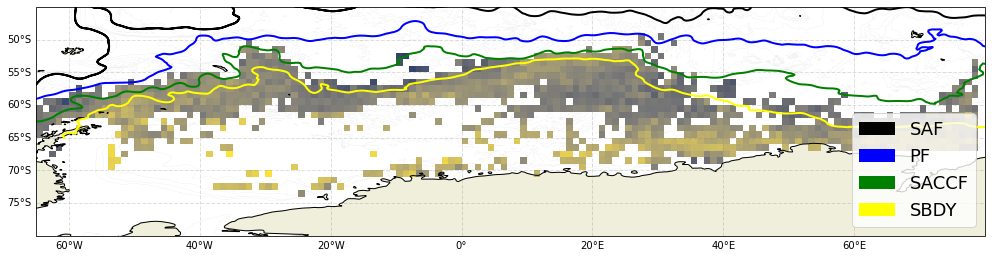

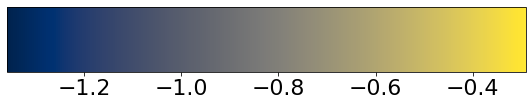

----- Dynamic height: 500 dbar -----
plot_tools.plot_hist_map
file_io.load_bathymetry


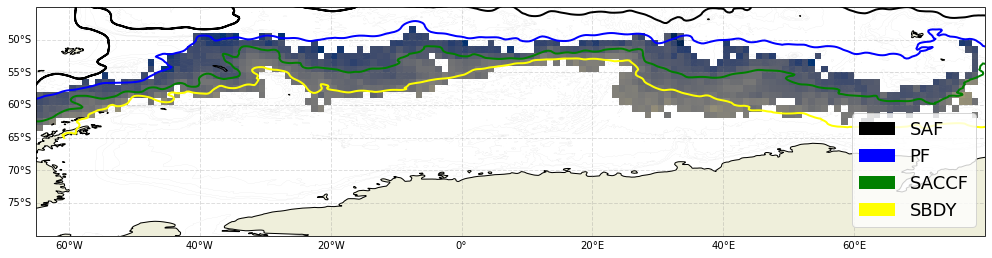

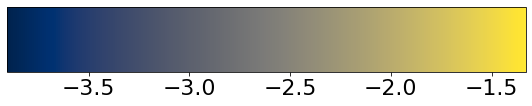

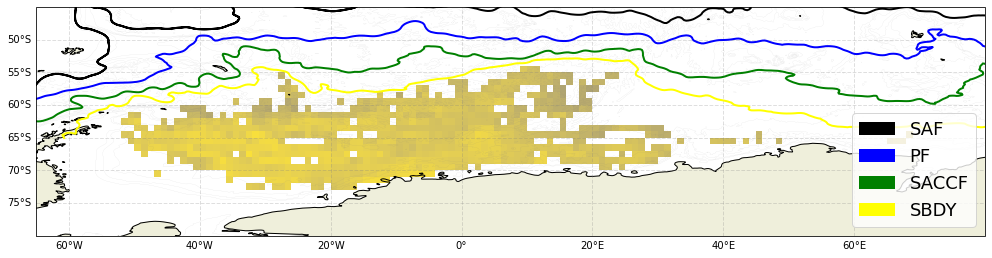

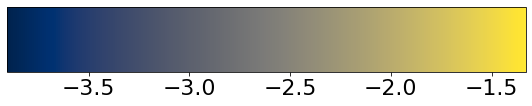

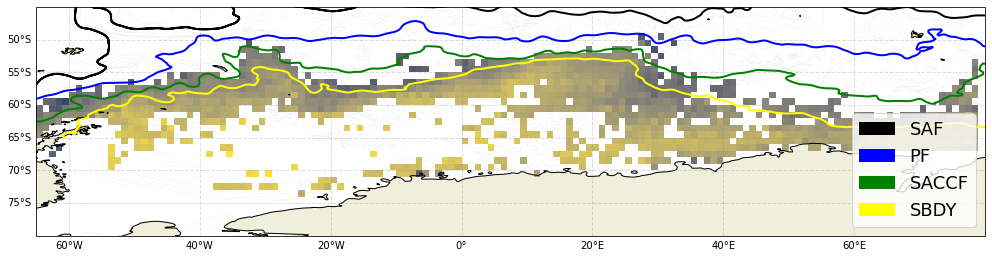

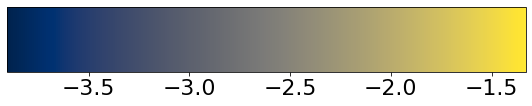

----- Dynamic height: 1000 dbar -----
plot_tools.plot_hist_map
file_io.load_bathymetry


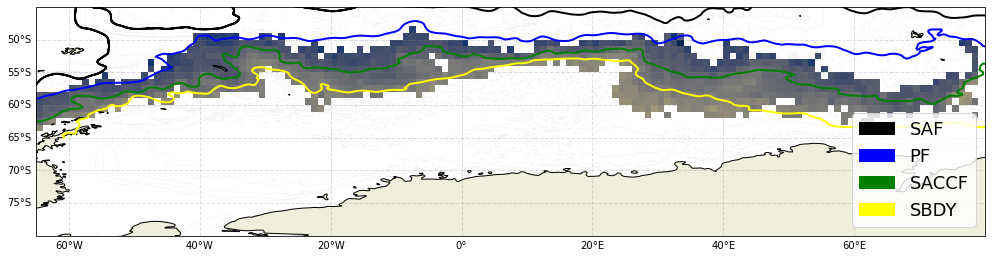

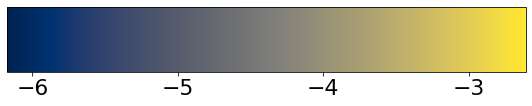

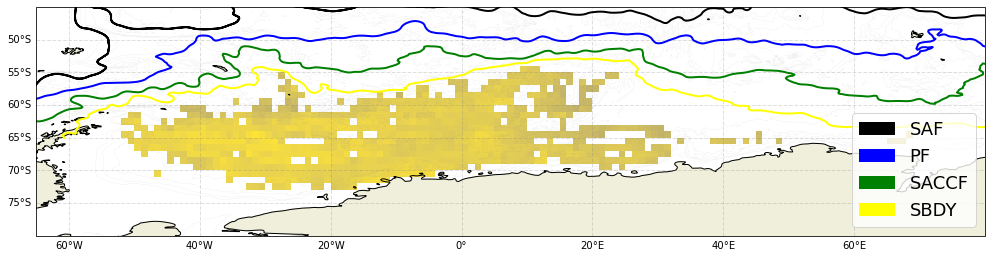

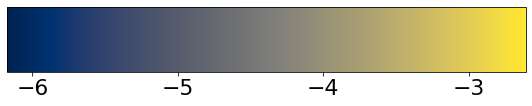

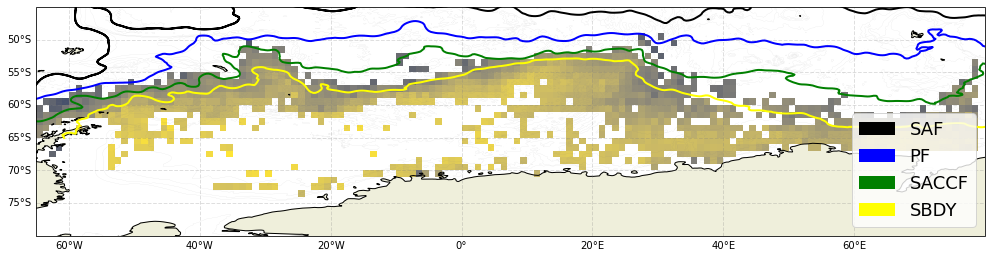

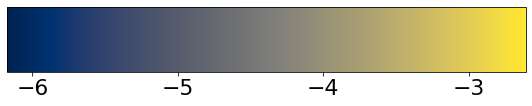

In [9]:
# plot maps of dynamic height
pt.plot_dynamic_height_maps(ploc, dfp, lon_range, lat_range, n_components_selected)

### imetric

class = 0
min / Q25 / Q50 / Q75 / max
0.00 / 0.00 / 0.00 / 0.05 / 1.00
class = 1
min / Q25 / Q50 / Q75 / max
0.00 / 0.00 / 0.01 / 0.02 / 1.00
class = 2
min / Q25 / Q50 / Q75 / max
0.00 / 0.00 / 0.00 / 0.07 / 1.00
plot_tools.plot_hist_map
file_io.load_bathymetry


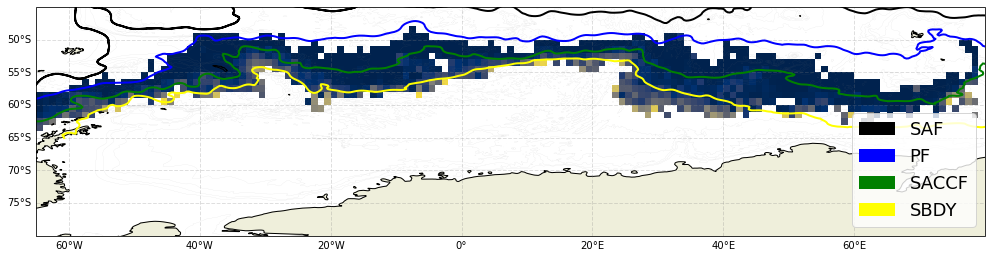

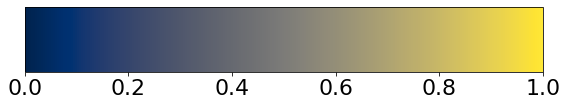

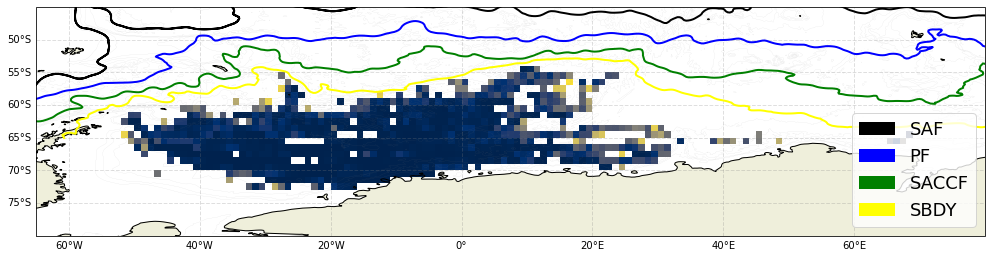

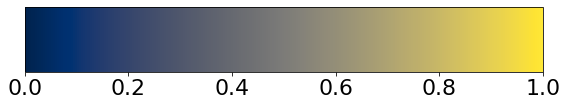

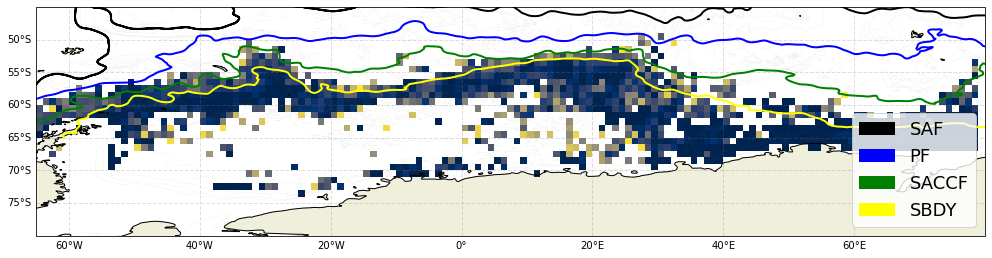

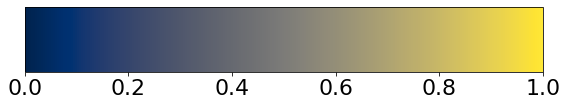

In [10]:
# print mld stats
density.calc_oneLevel_stats(ploc, dfp, n_components_selected, 'imetric')

# histogram map (imetric)
pt.plot_hist_map(ploc, df1D, lon_range, lat_range,
                 n_components_selected,
                 c_range=(0,1),
                 vartype='imetric',
                 colormap=plt.get_cmap('cividis'))

### Volume histograms 

plot_tools.calc_and_plot_volume_histogram_TS


/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/computation.py:733: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


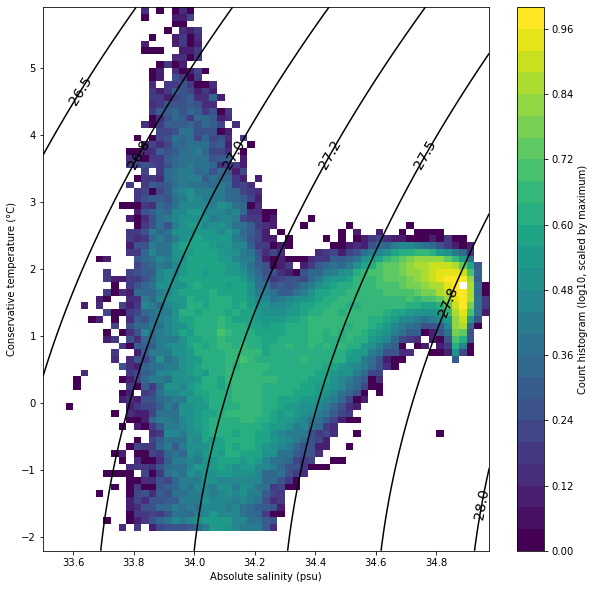

plot_tools.calc_and_plot_volume_histogram_TS


/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/computation.py:733: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


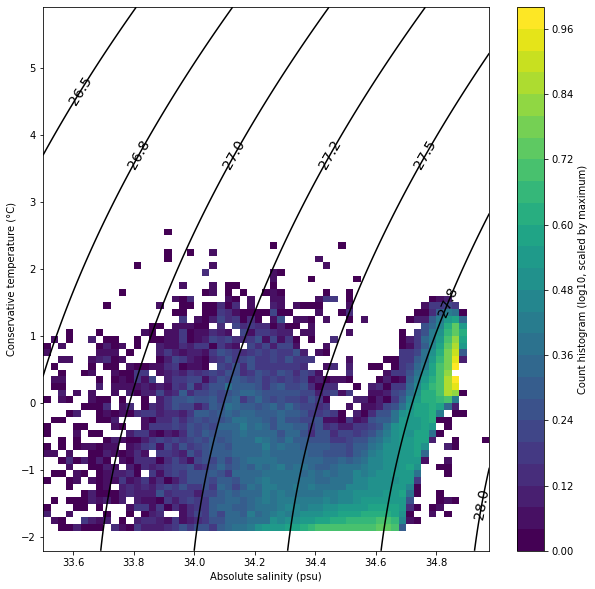

plot_tools.calc_and_plot_volume_histogram_TS


/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/computation.py:733: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


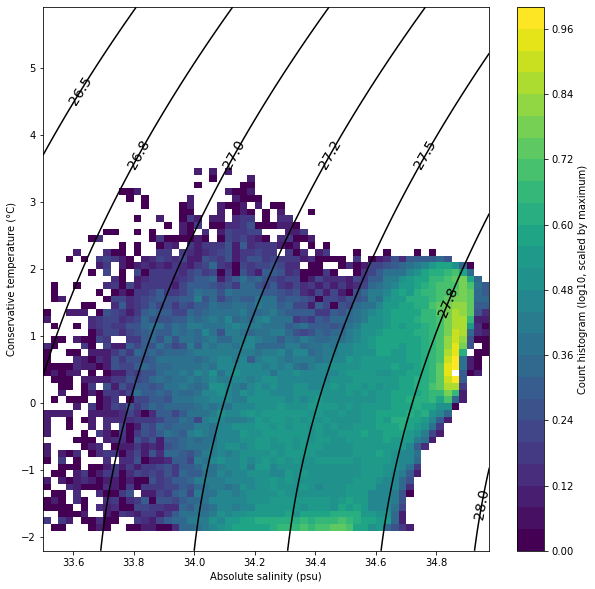

ValueError: zero-size array to reduction operation minimum which has no identity

In [11]:
# some T-S histograms
sbins = np.arange(Srange[0], Srange[1], 0.025)
tbins = np.arange(Trange[0], Trange[1], 0.1)
df_select = dfp.where(dfp.label==0, drop=True)
histTS_class1 = pt.calc_and_plot_volume_histogram_TS(ploc, df_select, sbins=sbins, tbins=tbins, modStr='class1')
df_select = dfp.where(dfp.label==1, drop=True)
histTS_class2 = pt.calc_and_plot_volume_histogram_TS(ploc, df_select, sbins=sbins, tbins=tbins, modStr='class2')
df_select = dfp.where(dfp.label==2, drop=True)
histTS_class3 = pt.calc_and_plot_volume_histogram_TS(ploc, df_select, sbins=sbins, tbins=tbins, modStr='class3')
df_select = dfp.where(dfp.label==3, drop=True)
histTS_class4 = pt.calc_and_plot_volume_histogram_TS(ploc, df_select, sbins=sbins, tbins=tbins, modStr='class4')

### Maximum temperature 

In [12]:
dfp

<xarray.Dataset>
Dimensions:        (profile: 28397, depth: 21, CLASS: 3, depth_mid: 20)
Coordinates:
  * profile        (profile) int64 13 14 15 16 ... 142282 142301 142320 142330
    lon            (profile) float64 ...
    lat            (profile) float64 ...
  * depth          (depth) float64 20.0 40.0 60.0 80.0 ... 820.0 910.0 1e+03
    time           (profile) datetime64[ns] ...
    year           (profile) int64 ...
    month          (profile) int64 ...
  * CLASS          (CLASS) int64 0 1 2
  * depth_mid      (depth_mid) float64 30.0 50.0 70.0 90.0 ... 775.0 865.0 955.0
Data variables: (12/22)
    prof_date      (profile) float64 ...
    prof_YYYYMMDD  (profile) float64 ...
    prof_HHMMSS    (profile) float64 ...
    sig0           (profile, depth) float64 ...
    prof_SA        (profile, depth) float64 ...
    prof_CT        (profile, depth) float64 ...
    ...             ...
    Smin_depth     (profile) float64 ...
    Smax           (profile) float64 ...
    Smax_depth     (profile) float64 ...
    sig0min        (profile) float64 ...
    sig0max        (profile) float64 ...
    imetric        (profile) float64 ...

class = 0
min / Q25 / Q50 / Q75 / max
1.25 / 1.85 / 2.02 / 2.22 / 6.97
class = 1
min / Q25 / Q50 / Q75 / max
0.18 / 0.50 / 0.67 / 0.88 / 2.53
class = 2
min / Q25 / Q50 / Q75 / max
-1.71 / 0.73 / 1.25 / 1.61 / 3.47
plot_tools.plot_hist_map
file_io.load_bathymetry


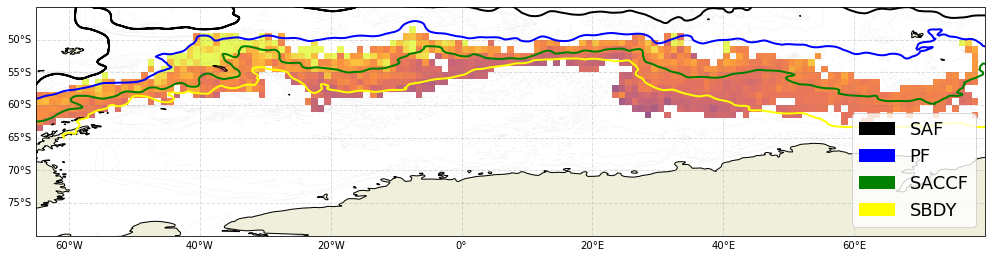

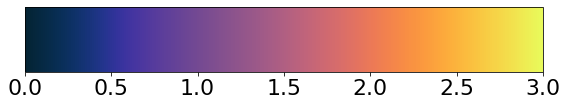

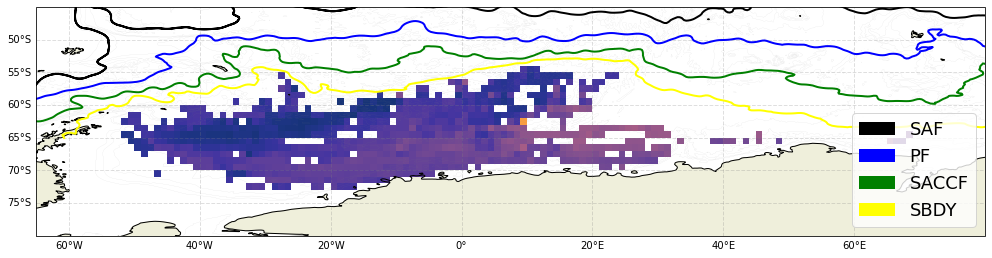

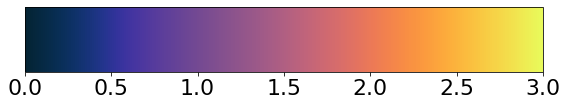

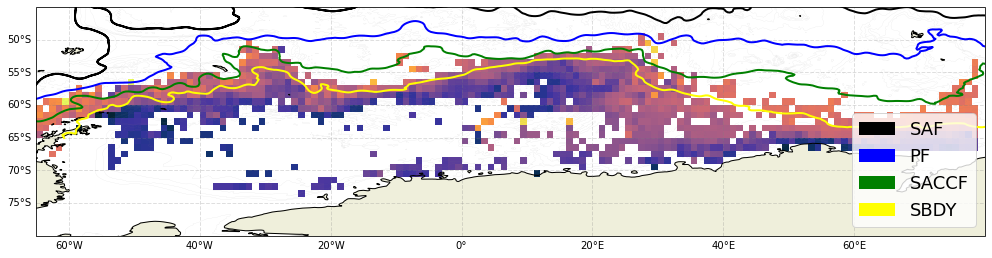

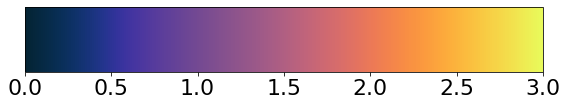

In [13]:
# print stats
density.calc_oneLevel_stats(ploc, dfp, n_components_selected, 'Tmax')

# histogram map (Tmax)
pt.plot_hist_map(ploc, df1D, lon_range, lat_range,
                 n_components_selected,
                 c_range=(0,3),
                 vartype='Tmax',
                 colormap=cmocean.cm.thermal)

### Minimum temperature

class = 0
min / Q25 / Q50 / Q75 / max
-1.87 / -0.42 / 0.15 / 0.63 / 1.89
class = 1
min / Q25 / Q50 / Q75 / max
-1.90 / -1.84 / -1.78 / -1.62 / 0.22
class = 2
min / Q25 / Q50 / Q75 / max
-1.89 / -1.72 / -1.21 / -0.53 / 1.50
plot_tools.plot_hist_map
file_io.load_bathymetry


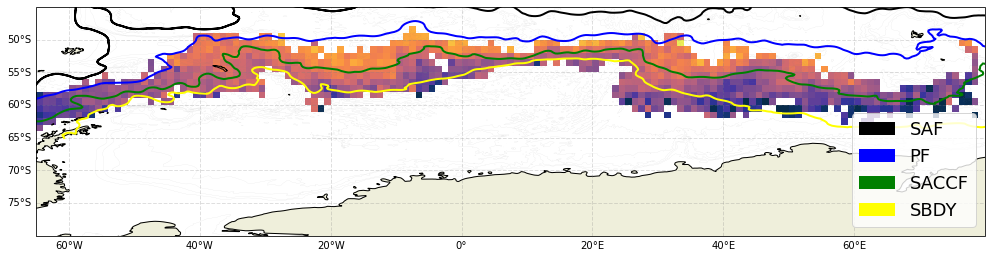

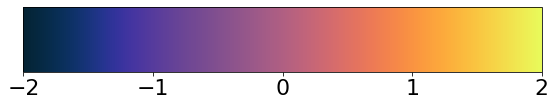

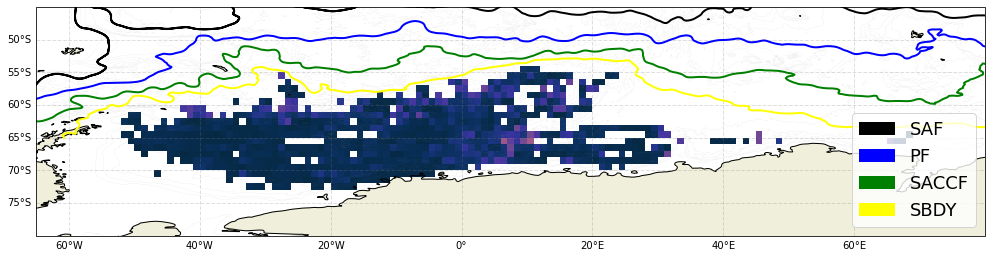

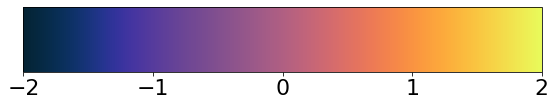

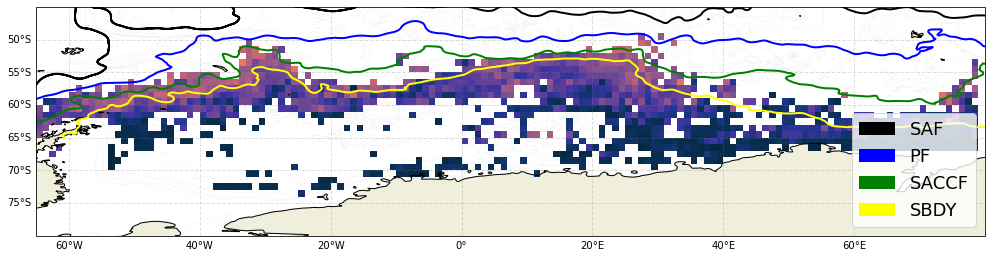

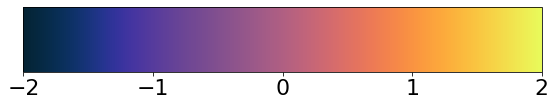

In [14]:
# print stats
density.calc_oneLevel_stats(ploc, dfp, n_components_selected, 'Tmin')

# histogram map (Tmax)
pt.plot_hist_map(ploc, df1D, lon_range, lat_range,
                 n_components_selected,
                 c_range=(-2,2),
                 vartype='Tmin',
                 colormap=cmocean.cm.thermal)

### Minimum salinity

class = 0
min / Q25 / Q50 / Q75 / max
33.59 / 33.97 / 34.04 / 34.11 / 34.39
class = 1
min / Q25 / Q50 / Q75 / max
33.19 / 34.14 / 34.32 / 34.49 / 34.68
class = 2
min / Q25 / Q50 / Q75 / max
32.99 / 33.99 / 34.13 / 34.26 / 34.67
plot_tools.plot_hist_map
file_io.load_bathymetry


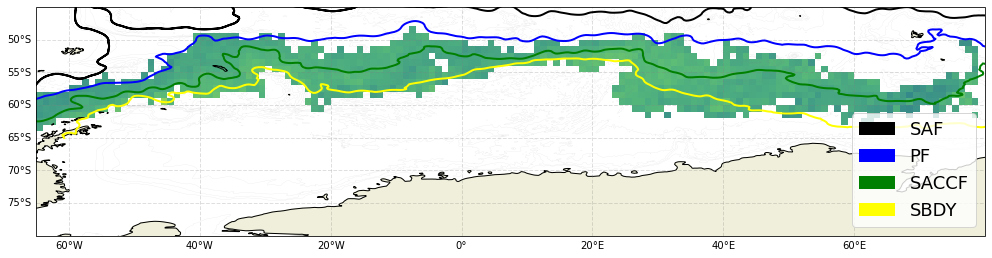

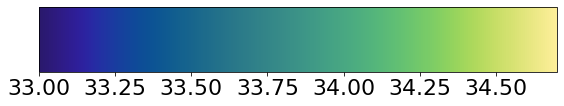

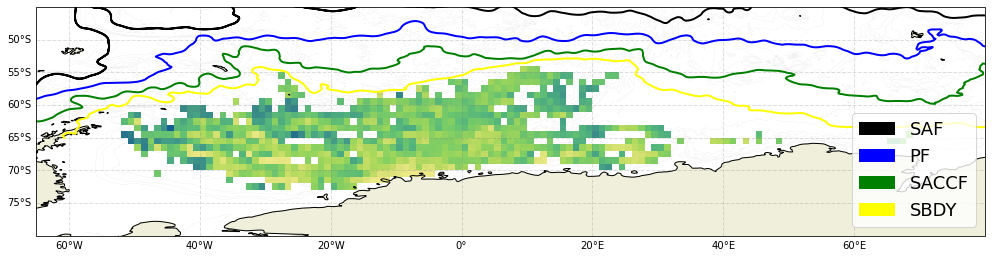

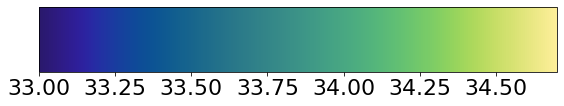

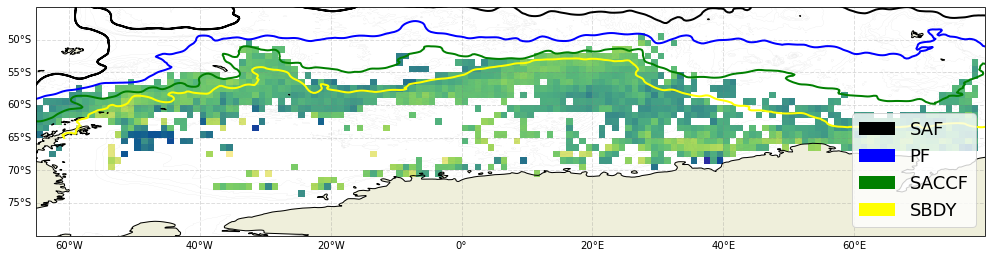

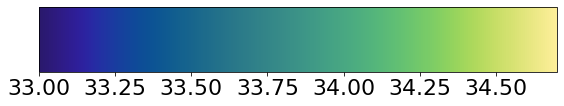

In [15]:
# print stats
density.calc_oneLevel_stats(ploc, dfp, n_components_selected, 'Smin')

# histogram map (Tmax)
pt.plot_hist_map(ploc, df1D, lon_range, lat_range,
                 n_components_selected,
                 c_range=(33.0, 34.7),
                 vartype='Smin',
                 colormap=cmocean.cm.haline)

### T-S histogram by month

plot_tools.plot_hist_map


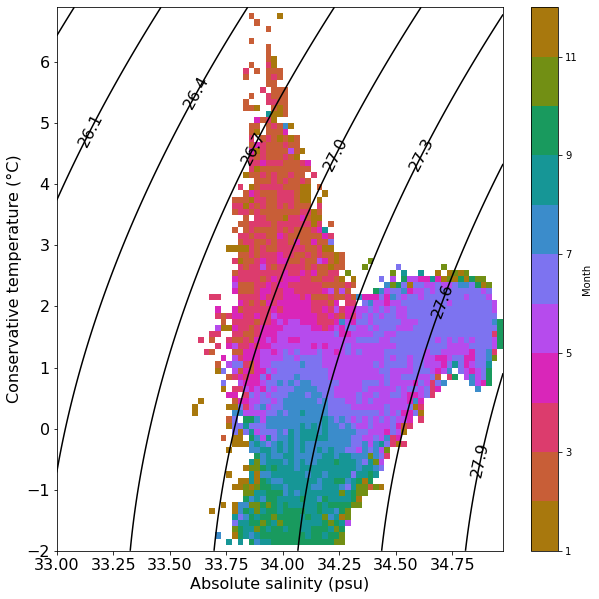

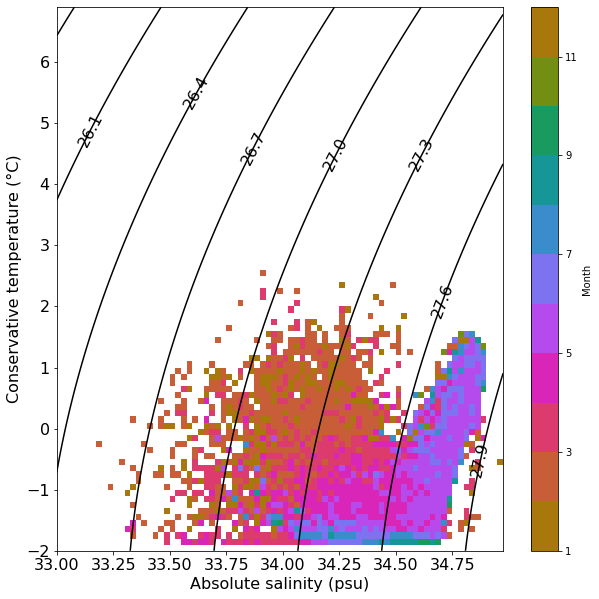

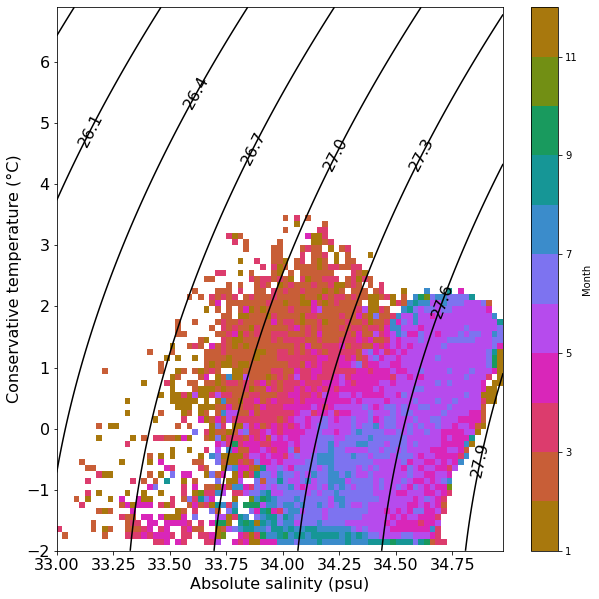

In [16]:
pt.plot_hist_TS(ploc, dfp, n_components_selected,
                sbins = np.arange(33, 35, 0.025), 
                tbins = np.arange(-2, 7, 0.1),
                vartype='month',
                colormap=cmocean.cm.phase)

## T-S histogram by year

plot_tools.plot_hist_map


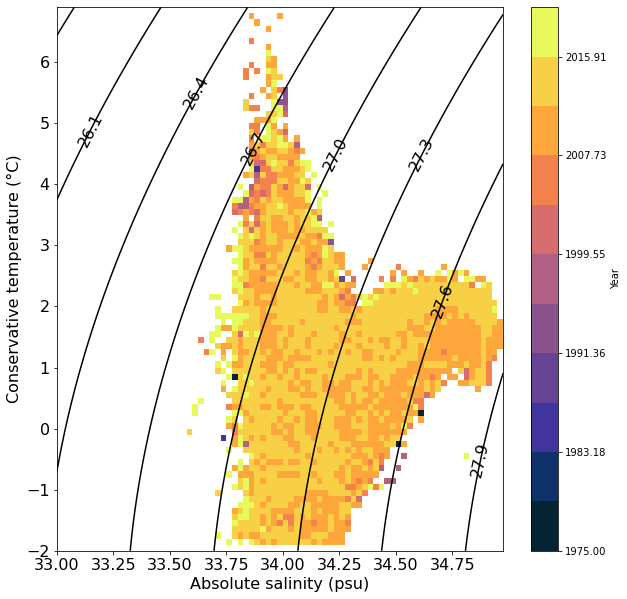

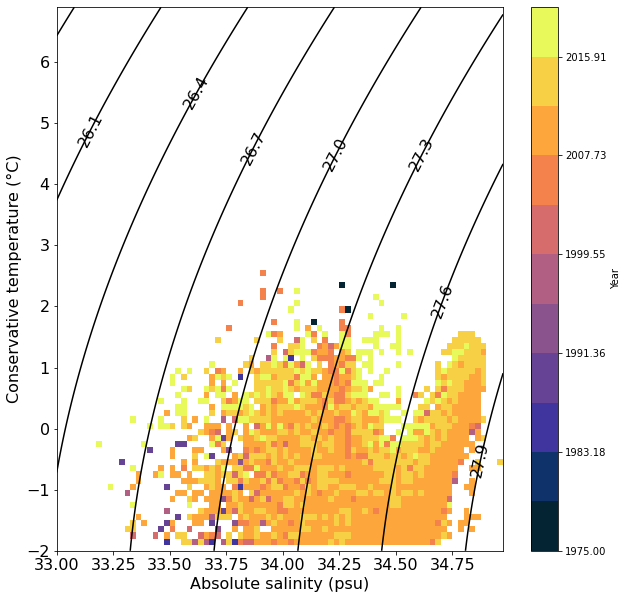

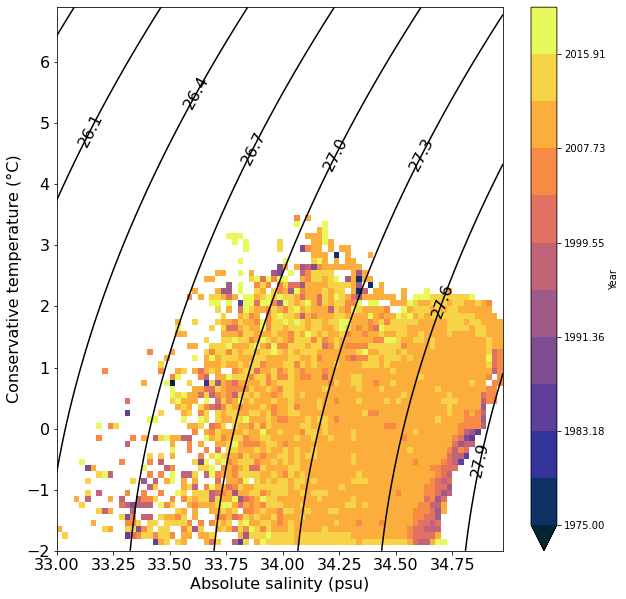

In [17]:
pt.plot_hist_TS(ploc, dfp, n_components_selected,
                sbins = np.arange(33, 35, 0.025), 
                tbins = np.arange(-2, 7, 0.1),
                vartype='year',
                crange=[1975, 2020],
                colormap=cmocean.cm.thermal)

## T-S histogtram by MLD

plot_tools.plot_hist_map


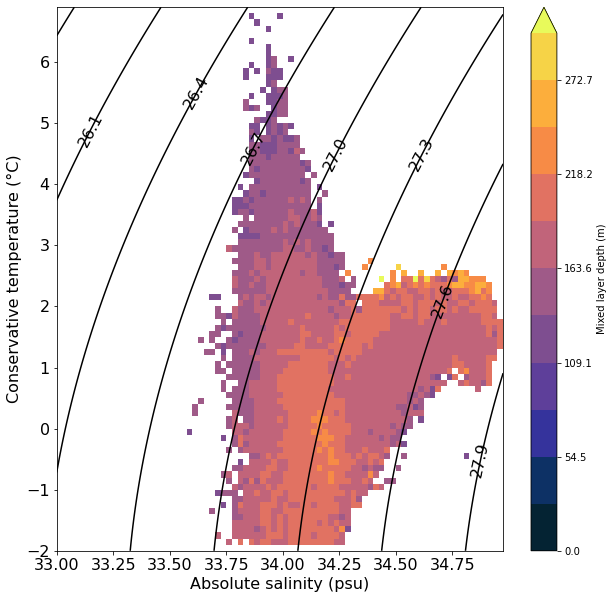

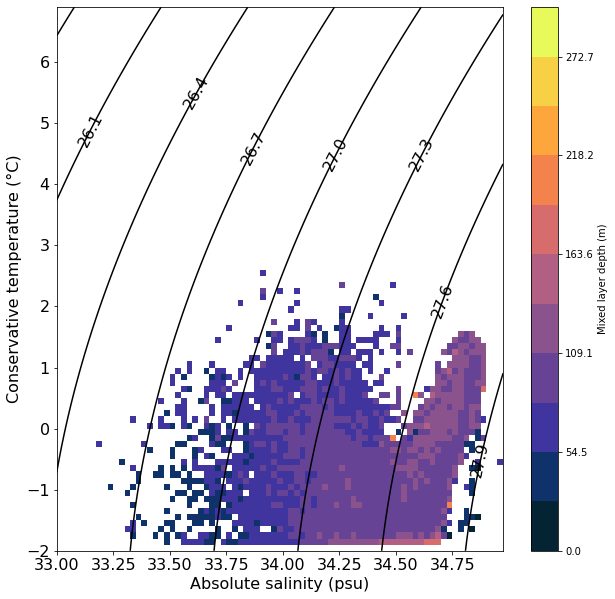

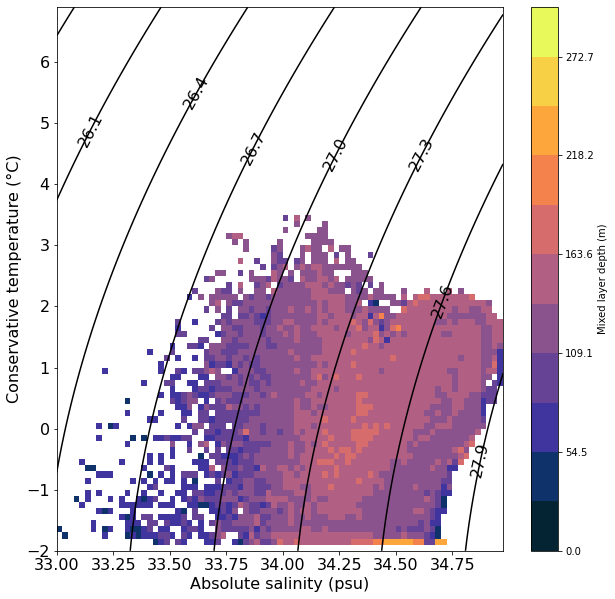

In [18]:
pt.plot_hist_TS(ploc, dfp, n_components_selected,
                sbins = np.arange(33, 35, 0.025), 
                tbins = np.arange(-2, 7, 0.1),
                vartype='mld',
                crange=[0, 300],
                colormap=cmocean.cm.thermal)

## T-S histogram by imetric

plot_tools.plot_hist_map


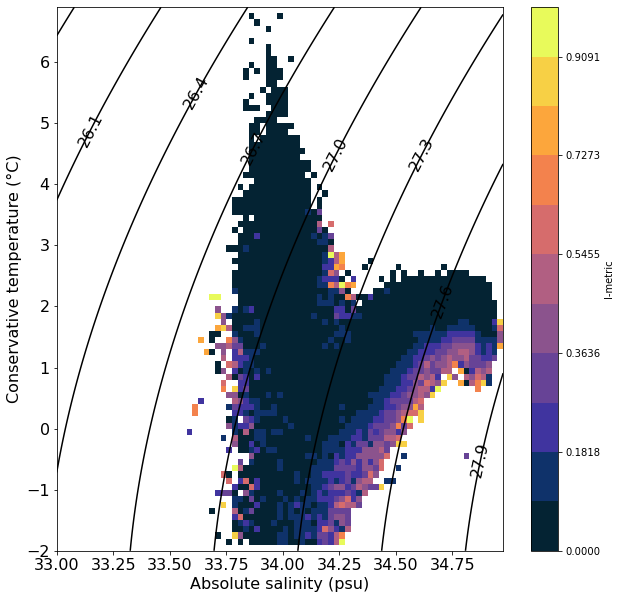

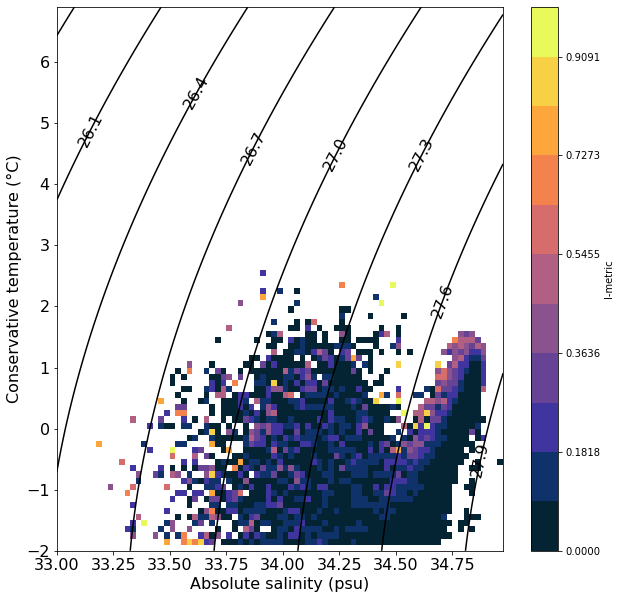

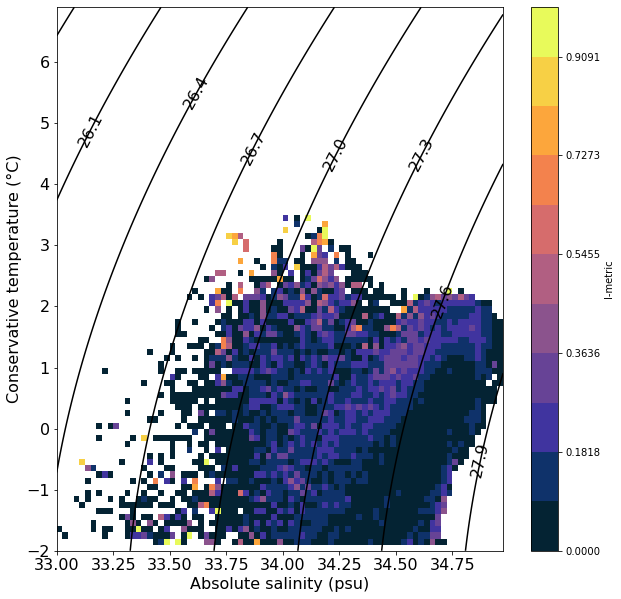

In [19]:
pt.plot_hist_TS(ploc, dfp, n_components_selected,
                sbins = np.arange(33, 35, 0.025), 
                tbins = np.arange(-2, 7, 0.1),
                vartype='imetric',
                crange=[0, 1],
                colormap=cmocean.cm.thermal)

## Get mean label in each 1x1 bin

plot_tools.plot_hist_map
file_io.load_bathymetry


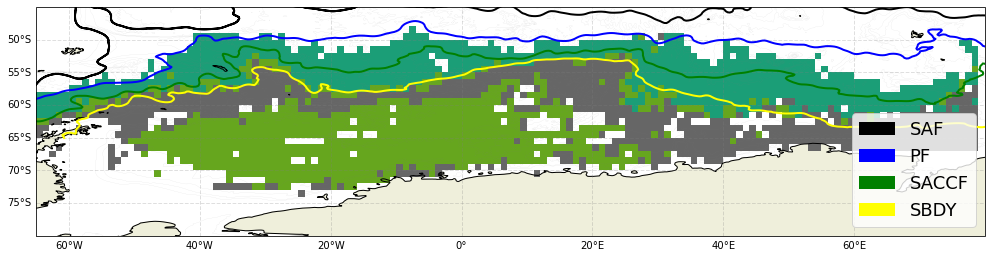

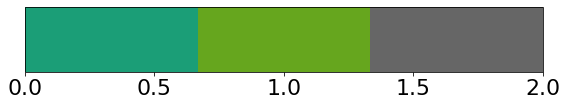

In [22]:
pt.plot_hist_map(ploc, dfp,
                 lon_range, lat_range,
                 n_components_selected,
                 c_range=[0,2],
                 vartype='label',
                 colormap=colormap)